# Lecture 16: Estimation

In [1]:
from datascience import *
import numpy as np

import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
%matplotlib inline

## Sampling flights

In [2]:
united = Table.read_table('united.csv')
united

Date   | Flight Number | Destination | Delay
6/1/15 | 73            | HNL         | 257
6/1/15 | 217           | EWR         | 28
6/1/15 | 237           | STL         | -3
6/1/15 | 250           | SAN         | 0
6/1/15 | 267           | PHL         | 64
6/1/15 | 273           | SEA         | -6
6/1/15 | 278           | SEA         | -8
6/1/15 | 292           | EWR         | 12
6/1/15 | 300           | HNL         | 20
6/1/15 | 317           | IND         | -10
... (13722 rows omitted)

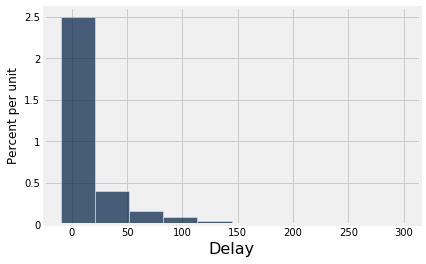

In [3]:
# Who knows the probability distribution?
# But let's take that table as the population.
united.hist('Delay')

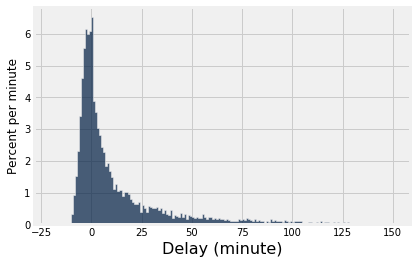

In [4]:
def delay_hist(t):
    t.hist('Delay', unit='minute', bins=np.arange(-20, 151, 1))
    
delay_hist(united)

In [5]:
# Most delays between 1 and 20 min
between1and20 = united.where('Delay', are.between(1, 20)).num_rows
num_delays = united.where('Delay', are.above(0)).num_rows
between1and20 / num_delays

0.5882877148313176

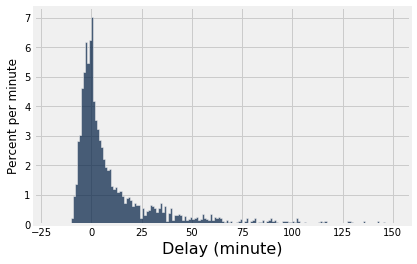

In [16]:
# Empirical distribution of a random sample
# looks like probability distribution, and more
# so as sample size increases
s = united.sample(5000)
delay_hist(s)

In [17]:
# Most delays between 1 and 20 min
between1and20 = s.where('Delay', are.between(1, 20)).num_rows
num_delays = s.where('Delay', are.above(0)).num_rows
between1and20 / num_delays

0.595536959553696

## Estimating enemy planes

In [18]:
N = 300
serialno = Table().with_column('Serial number', np.arange(N)+1)
serialno

Serial number
1
2
3
4
5
6
7
8
9
10
... (290 rows omitted)

In [22]:
serialno.sample(30).column(0).max()

286

### Interlude:  appending to arrays

In [23]:
a = make_array(1, 2, 3, 4, 5)
a

array([1, 2, 3, 4, 5], dtype=int64)

In [24]:
np.append(a, 42)

array([ 1,  2,  3,  4,  5, 42], dtype=int64)

In [25]:
a

array([1, 2, 3, 4, 5], dtype=int64)

In [26]:
a = np.append(a, 42)
a

array([ 1,  2,  3,  4,  5, 42], dtype=int64)

What is the result of this code?

```
x = make_array(100, 42, 7)
x = np.append(x, 0)
x = np.append(x, 1)
x
```

A. `array([100, 42, 7])`  
B. `array([1, 0, 100, 42, 7, 0, 1])`  
C. `array([100, 42, 7, 0, 1])`  
D. I don't know  
E. none of the above  

In [27]:
x = make_array(100, 42, 7)
x = np.append(x, 0)
x = np.append(x, 1)
x

array([100,  42,   7,   0,   1], dtype=int64)

### Simulation of estimation with max

In [30]:
sample_size = 10
repetitions = 750

maxes = make_array()

for i in np.arange(repetitions):
    sampled_numbers = serialno.sample(sample_size).column(0)
    statistic = sampled_numbers.max()
    maxes = np.append(maxes, statistic)

estimates = Table().with_column('Sample Max', maxes)
estimates

Sample Max
251
211
291
270
286
283
277
287
277
289
... (740 rows omitted)

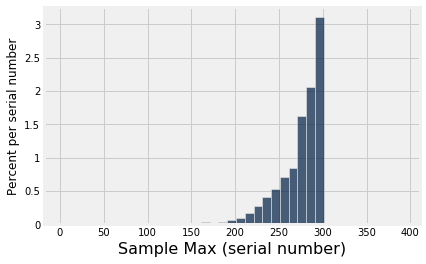

In [31]:
estimates.hist(bins=np.arange(1, N+100, 10), unit='serial number')

What would happen if we changed sample size to 10 instead of 30?

A. The histogram would spread out, with more area to the left of 300.  
B. The histogram would spread out, with more area to the right of 300.  
C. The histogram would compress, with more area concentrated around 300.  
D. Not predictable.  
E. None of the above  

### Simulation of estimate with average

In [33]:
2*np.mean(np.arange(1, 300+1))

301.0

In [34]:
sample_size = 30
repetitions = 750

double_averages = make_array()

for i in np.arange(repetitions):
    sampled_numbers = serialno.sample(sample_size).column(0)
    statistic = 2 * sampled_numbers.mean()
    double_averages = np.append(double_averages, statistic)

estimates = Table().with_columns(
    '2 * average', double_averages
)

estimates

2 * average
360.133
272.533
250.6
284.867
268.933
313.267
268.467
278.333
301.333
361.733
... (740 rows omitted)

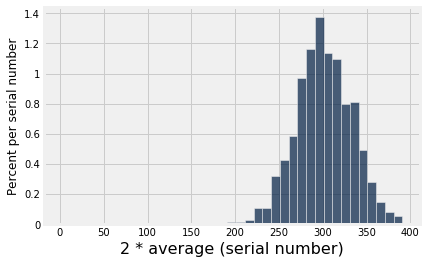

In [35]:
estimates.hist(bins=np.arange(1, N+100, 10), unit='serial number')

### Comparison of statistics

In [36]:
sample_size = 30
repetitions = 750

maxes = make_array()
double_averages = make_array()

for _ in np.arange(repetitions):
    sampled_numbers = serialno.sample(sample_size).column(0)
    maxes = np.append(maxes, sampled_numbers.max())  
    double_averages = np.append(double_averages, 2 * sampled_numbers.mean())

estimates = Table().with_columns(
    'Max', maxes,
    '2 * average', double_averages
)

estimates

Max  | 2 * average
290  | 339.4
284  | 296.867
297  | 294.2
300  | 320.867
291  | 259.867
287  | 284.6
290  | 324.267
299  | 309.733
293  | 249.467
290  | 310.8
... (740 rows omitted)

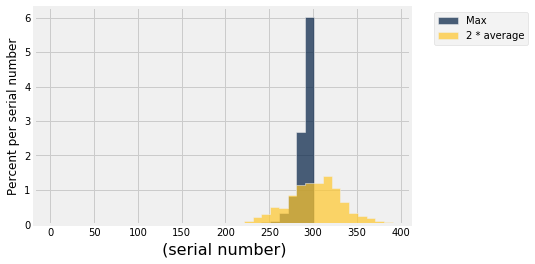

In [37]:
estimates.hist(bins=np.arange(1, N+100, 10), unit='serial number')

**Discussion question:** which estimate would be better for the Allies?